Wybierz podpunkt: 1-a 2-b
Podpunkt2
2
Czy chcesz zmienic parametry algorytmu genetycznego ?: 1-Tak 
Zmiana: 4
Czy chcesz podac punkty recznie?: 1-Tak
Recznie: 4
Parametry okregu:
x =  0.396 
y =  0.257 
r =  0.586
Najlepszy wynik osiagnieto w petli nr:  57.0


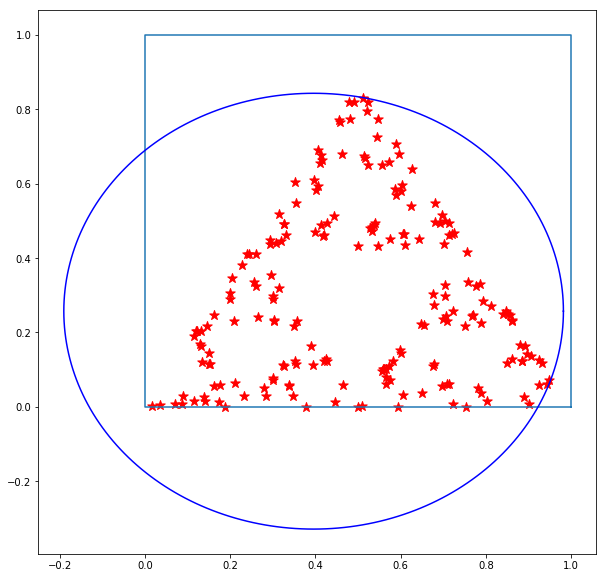

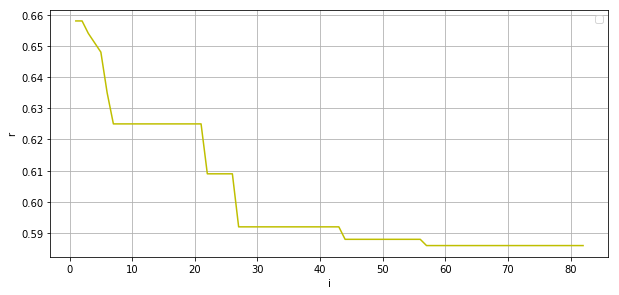

In [3]:
#skrypt inicjujacy caly program
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
import numpy as np
import import_ipynb
import os
import gui
import main as mm
import functions as fun
import points as pnt

#pole pod wykres
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
fig2=plt.figure(figsize=(10,10))
bx=fig2.add_subplot(1,1,1) 

#wektory punktow
xwek=[]
ywek=[]

#parametry algorytmu 
mi=20
lambda2=7*mi
loci=6
prawd=0.1

#wybor podpunktu
print("Wybierz podpunkt: 1-a 2-b")
podpunkt=int(input("Podpunkt"))
print(podpunkt)

#zmiana parametrow algorytmu
print("Czy chcesz zmienic parametry algorytmu genetycznego ?: 1-Tak ")
zmiana=int(input("Zmiana: "))
if zmiana == 1:
    loci=int(input("Ilość loci do krzyżowania:"))
    mi=int(input("Wielkość populacji: "))
    prawd=float(input("Prawdopodobienstwo mutacji:"))
                    
#tryb generacji punktow
print("Czy chcesz podac punkty recznie?: 1-Tak")
metoda=int(input("Recznie: "))
if metoda == 1:#reczne dodanie punktow  
    gui.MANUAL(xwek,ywek)
    Excelread=pd.read_excel("danenowe2.xlsx",sheet_name='Arkusz1')

    xwek = Excelread['x'].values.tolist()
    ywek = Excelread['y'].values.tolist()
        
    n=len(xwek)
        
    tab=[[0]*2 for i in range(n)]
    for i in range(n):
            tab[i][0] = xwek[i]
            tab[i][1] = ywek[i]
    
    if podpunkt == 1:        
        mm.mutacja(1,mi,lambda2,loci,prawd,n,tab)#podpunkt a
    else:
        mm.mutacja(0,mi,lambda2,loci,prawd,n,tab)#podpunkt b
                    
else:#punkty z pliku
    
    if podpunkt == 1:#podpunkt a
        
        Excelread=pd.read_excel('dane.xlsx',sheet_name='dane')

        xwek = Excelread['x'].values.tolist()
        ywek = Excelread['y'].values.tolist()
        
        n=len(xwek)
        
        tab=[[0]*2 for i in range(n)]
        for i in range(n):
            tab[i][0] = xwek[i]
            tab[i][1] = ywek[i]
        
        mm.mutacja(1,mi,lambda2,loci,prawd,n,tab)
        
    else:#podpunkt b(RIA)
        
        pnt.IFS([[0.5,0,0,0.5,0,0],[0.5,0,0,0.5,1,0],[0.5,0,0,0.5,0.5,0.2886]],3,xwek,ywek)
        Excelread3=pd.read_excel("danenowe.xlsx",sheet_name='Arkusz1')
        xxxx=Excelread3['x'].values.tolist()
        yyyy=Excelread3['y'].values.tolist()
        maxy=max(yyyy)
        miny=min(yyyy)
        minx=min(xxxx)
        maxx=max(xxxx)
        #print(miny,maxy,minx,maxx)
        hh = np.asarray(yyyy)
        N = 1.0/2
        ywek = N*hh
        xwek=xxxx
        n=len(xwek)
        
        tab=[[0]*2 for i in range(n)]
        for i in range(n):
            tab[i][0] = xwek[i]
            tab[i][1] = ywek[i]
        
        mm.mutacja(0,mi,lambda2,loci,prawd,n,tab)
        
#odczyt x,y,r najlepszego okregu
Excelread2=pd.read_excel('data.xlsx',sheet_name='Arkusz1')
data = Excelread2['data'].values.tolist()

#parametry okregu                  
R=data[2]
xzadane=data[0]
yzadane=data[1]
print('Parametry okregu:\nx = ',data[0],'\ny = ',data[1],'\nr = ',data[2])
print('Najlepszy wynik osiagnieto w petli nr: ',data[4])
if podpunkt ==1:
    print('Blad wyniosl: ',data[3])
               
#Kwadrat
xx=[1,0,0,1,1]
yy=[0,0,1,1,0]

#Okrag
n=256
t=np.linspace(0, 2*np.pi, n+1)
x=R*np.cos(t)+xzadane
y=R*np.sin(t)+yzadane

#Rysowanie punktow

ax.scatter(xwek,ywek,label='punkty',color='r',marker='*',s=100)
                    
#Rysowanie kwadratu
ax.plot(xx,yy)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend('PSZT')
#Rysowanie okregu
ax.plot(x,y,color='b')

if podpunkt == 1:
    e=[]
    for i in range(int(data[4]+25)):
        if i < data[4]:
            e.append(data[5+i])
        else:
            e.append(data[int(data[4]+4)])
    I = []
    for i in range(int(data[4]+25)):
        I.append(i+1)
    #pole pod wykres
    plt.subplot(2,1,2)
    plt.grid()
    plt.xlabel('i')
    plt.ylabel('E')
    plt.legend('E(i)')
    #Rysowanie wykresu
    plt.plot(I,e,color='g')
    plt.show()
else:
    R = []
    for i in range(int(data[4]+25)):
        if i < data[4]:
            R.append(data[5+i])
        else:
            R.append(data[int(data[4]+4)])
    I = []
    for i in range(int(data[4]+25)):
        I.append(i+1)
    plt.subplot(2,1,2)
    plt.grid()
    plt.xlabel('i')
    plt.ylabel('r')
    plt.legend('r(i)')
    #Rysowanie wykresu
    plt.plot(I,R,color='y')
    plt.show()
